# ALMA Single Dish Conversion Guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.45 already installed.


ModuleNotFoundError: No module named 'xradio'

## Download dataset

In [2]:
from toolviper.utils.data import list_files

list_files()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ file                                     ┃ dtype          ┃ telescope   ┃ size     ┃ mode                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ea25_cal_small_before_fixed.split.ms     │ CASA MS v2     │ VLA         │ 0.209    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ ea25_cal_small_after_fixed.split.ms      │ CASA MS v2     │ VLA         │ 0.209    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ J1924-2914.ms.calibrated.split.SPW3      │ CASA MS v2     │ ALMA        │ 0.055    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ extract_holog_verification.json          │ json           │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ holog_numerical_verification.json        │ json           │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ locit-input-pha.cal                      │ CASA Cal Table │ VLA         │ 0.000468 │ antenna location cal table │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ panel_cutoff_mask                        │ npy            │ na          │ 0.000348 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ heuristic_model                          │ bin            │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ panel_test_files                         │ na             │ na          │          │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ AA2-Mid-sim_00000.ms                     │ CASA MS v2     │ SKA Mid     │ 0.029    │ Simulated Interferometer   │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_M8.img.zarr                     │ zarr           │ ALMA        │ 0.014    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.ms               │ CASA MS v2     │ ALMA        │ 0.202    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.py39.vis.zarr    │ zarr           │ ALMA        │ 0.207    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.ms         │ CASA MS v2     │ ALMA        │ 0.0056   │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.py39.vis.… │ zarr           │ ALMA        │ 0.0047   │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ complex_valued_uv.im                     │ image          │ Simulated   │ 0.768    │ Simulated                  │
├──────────────────────────────────────────┼────────────

In [3]:
import toolviper

toolviper.utils.data.download(file="sdimaging.ms")

[2024-12-06 17:16:08,395]  WARNING    viperlog:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python39/lib/python3.9/site-packages/toolviper/utils/data/.dropbox 
[2024-12-06 17:16:08,396]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List  
 ─────────────── 
  sdimaging.ms

sdimaging.ms.zip:   0%|          | 0.00/28.3M [00:00<?, ?iB/s]

## ALMA Single Dish Data

| Dataset | Telescope | Multi-Target | OFF Position | Ephemeris | Scan Pattern |
|---------|-----------|:------------:|:------------:|:---------:|:------------:|
| uid___A002_Xced5df_Xf9d9.small | ALMA |   | horizontal |   | raster |
| uid___A002_X1015532_X1926f.small | ALMA |   | relative | x | raster |
| uid___A002_Xe3a5fd_Xe38e.small | ALMA | x | absolute |   | raster |
| uid___A002_Xae00c5_X2e6b.small | ALMA |   | relative | x | fast |

- OFF position: 
    - **absolute**: OFF position has its own field entry in the FIELD table.
    - **relative**: OFF is a fixed position specified as an offset coordinate relative to the ON position.
    - **horizontal**: OFF is also an offset position relative to the ON position but specified so that its elevation value is always close to the ON position (meaning that the OFF position is moving with time).
- Scan pattern: raster scan/fast scan.
    - **raster**: Scan is, as the name indicates, a raster pattern with a relatively long integration time (0.1-1 sec) and channelized spectral window.
    - **fast**: Scan is either a Lissajous or double-circle pattern with short integration time (1 msec) and single-channel spectral window.

In [4]:
import toolviper
ms_file = "uid___A002_Xced5df_Xf9d9.small.ms"
toolviper.utils.data.download(file=ms_file)

[2024-12-06 17:16:13,655]  WARNING    viperlog:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python39/lib/python3.9/site-packages/toolviper/utils/data/.dropbox 
[2024-12-06 17:16:13,657]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List                      
 ─────────────────────────────────── 
  uid___A002_Xced5df_Xf9d9.small.ms

uid___A002_Xced5df_Xf9d9.small.ms.zip:   0%|          | 0.00/16.3M [00:00<?, ?iB/s]

## Setup Dask Client

In [5]:
from toolviper.dask import local_client

viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2024-12-06 17:16:18,529]     INFO    viperlog:  Module path: /home/fedemp/ws_xradio_dev/venv_xradio_python39/lib/python3.9/site-packages/toolviper 
[2024-12-06 17:16:18,535]  WARNING    viperlog:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2024-12-06 17:16:20,246]     INFO    viperlog:  Client <MenrvaClient: 'tcp://127.0.0.1:38503' processes=4 threads=4, memory=14.90 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38503,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:39307,Total threads: 1
Dashboard: http://127.0.0.1:36713/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:42561,


## Convert to Processing Set

In [6]:
from xradio.measurement_set import convert_msv2_to_processing_set
ps_store = ms_file.replace(".ms", ".cor.zarr")

convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=ps_store,
    parallel=True,
    overwrite=True,
)

[2024-12-06 17:16:21,891]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-12-06 17:16:22,010]     INFO    viperlog:  Number of partitions: 20 
[2024-12-06 17:16:22,011]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [10], FIELD [1], SCAN [ 2  4  6  8 10 12 14 16 18] 
[2024-12-06 17:16:22,012]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [11], FIELD [1], SCAN [ 2  4  6  8 10 12 14 16 18] 
[2024-12-06 17:16:22,013]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [12], FIELD [1], SCAN [ 2  4  6  8 10 12 14 16 18] 
[2024-12-06 17:16:22,014]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53], FIELD [1], SCAN [ 3  5  7  9 11 13 15 17] 
[2024-12-06 17:16:22,015]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52], FIELD [1], SCAN [ 3  5  7  9 11 

## Processing Set

In [7]:
from xradio.measurement_set import open_processing_set

import pandas as pd
pd.set_option('display.max_colwidth', 1000)

ps = open_processing_set(ps_store)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
14,uid___A002_Xced5df_Xf9d9.small_00,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)","[XX, YY]","[2, 4, 6, 8, 10, 12, 14, 16, 18]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
7,uid___A002_Xced5df_Xf9d9.small_01,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)","[XX, YY]","[2, 4, 6, 8, 10, 12, 14, 16, 18]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
10,uid___A002_Xced5df_Xf9d9.small_02,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(135, 2, 3, 2)","[XX, YY]","[2, 4, 6, 8, 10, 12, 14, 16, 18]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
0,uid___A002_Xced5df_Xf9d9.small_03,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[3, 5, 7, 9, 11, 13, 15, 17]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
3,uid___A002_Xced5df_Xf9d9.small_04,[OBSERVE_TARGET#ON_SOURCE],"(5850, 2, 3, 2)","[XX, YY]","[3, 5, 7, 9, 11, 13, 15, 17]",X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[NGC1097_1],[NGC1097_1],[CO_v_0_2_1(ID=3768101)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.295643e+11,2.295648e+11
4,uid___A002_Xced5df_Xf9d9.small_05,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WVR#OFF_SOURCE]","(135, 2, 3, 2)","[XX, YY]","[2, 4, 6, 8, 10, 12, 14, 16, 18]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
8,uid___A002_Xced5df_Xf9d9.small_06,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#AMBIENT]","(135, 2, 3, 2)","[XX, YY]","[2, 4, 6, 8, 10, 12, 14, 16, 18]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
15,uid___A002_Xced5df_Xf9d9.small_07,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(135, 2, 3, 2)","[XX, YY]","[2, 4, 6, 8, 10, 12, 14, 16, 18]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
1,uid___A002_Xced5df_Xf9d9.small_08,[OBSERVE_TARGET#OFF_SOURCE],"(2844, 2, 3, 2)","[XX, YY]","[3, 5, 7, 9, 11, 13, 15, 17]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11
19,uid___A002_Xced5df_Xf9d9.small_09,[OBSERVE_TARGET#ON_SOURCE],"(5850, 2, 3, 2)","[XX, YY]","[3, 5, 7, 9, 11, 13, 15, 17]",X1204293883#ALMA_RB_06#BB_2#SW-01#FULL_RES_1,[NGC1097_1],[NGC1097_1],[Continuum(ID=0)],"[icrs, 2h46m19.09s, -30d16m30.18s]",2.320078e+11,2.320390e+11


## MSv4

In [8]:
ms_xds = ps.sel(intents="OBSERVE_TARGET#OFF_SOURCE").get(0)
ms_xds

<xarray.MeasurementSetXds> Size: 444kB
Dimensions:                     (antenna_name: 2, time: 2844, frequency: 3,
                                 polarization: 2)
Coordinates:
  * antenna_name                (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
    scan_number                 (time) int64 23kB dask.array<chunksize=(2844,), meta=np.ndarray>
    telescope_name              (antenna_name) <U4 32B dask.array<chunksize=(2,), meta=np.ndarray>
  * time                        (time) float64 23kB 1.53e+09 ... 1.53e+09
  * frequency                   (frequency) float64 24B 2.296e+11 ... 2.296e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, antenna_name) float64 46kB dask.array<chunksize=(2844, 2), meta=np.ndarray>
    FLAG                        (time, antenna_name, frequency, polarization) bool 34kB dask.array<chunksize=(2844, 2, 3, 2), meta=np.ndarray>
    SPECTRUM                    (time, antenna_name, frequency, polarization) float32 137kB dask.array<chunksize=(2844, 2, 3, 2), meta=np.ndarray>
    TIME_CENTROID               (time, antenna_name) float64 46kB dask.array<chunksize=(2844, 2), meta=np.ndarray>
    WEIGHT                      (time, antenna_name, frequency, polarization) float32 137kB dask.array<chunksize=(2844, 2, 3, 2), meta=np.ndarray>
Attributes:
    creation_date:           2024-12-06T16:16:24.911008+00:00
    data_groups:             {'base': {'correlated_data': 'SPECTRUM', 'flag':...
    observation_info:        {'observer': ['schinnerer'], 'project': 'uid://A...
    partition_info:          {'field_name': ['NGC1097_1'], 'intents': ['OBSER...
    processor_info:          {'sub_type': 'ALMA_ACA', 'type': 'CORRELATOR'}
    schema_version:          4.0.-9992
    type:                    spectrum
    xradio_version:          0.0.45
    antenna_xds:             <xarray.Dataset> Size: 348B\nDimensions:        ...
    system_calibration_xds:  <xarray.Dataset> Size: 5MB\nDimensions:         ...
    pointing_xds:            <xarray.Dataset> Size: 6MB\nDimensions:         ...

### Partition_info

In [9]:
ms_xds.partition_info

{'field_name': ['NGC1097_1'],
 'intents': ['OBSERVE_TARGET#OFF_SOURCE'],
 'line_name': ['CO_v_0_2_1(ID=3768101)'],
 'polarization_setup': ['XX', 'YY'],
 'scan_number': [3, 5, 7, 9, 11, 13, 15, 17],
 'source_name': ['NGC1097_1'],
 'spectral_window_name': 'X1204293883#ALMA_RB_06#BB_1#SW-01#FULL_RES_0',
 'taql': 'WHERE (DATA_DESC_ID IN [0]) AND(OBSERVATION_ID IN [0]) AND(STATE_ID IN [13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53]) AND(FIELD_ID IN [1]) AND(SCAN_NUMBER IN [3,5,7,9,11,13,15,17]) AND(STATE_ID IN [13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53]) '}

### Processor_info

In [10]:
ms_xds.processor_info

{'sub_type': 'ALMA_ACA', 'type': 'CORRELATOR'}

### Observation_info

In [11]:
ms_xds.observation_info

{'observer': ['schinnerer'],
 'project': 'uid://A001/X1221/Xa61',
 'release_date': '1858-11-17T00:00:00.000000000'}

### Antenna_xds

In [12]:
ms_xds.antenna_xds

<xarray.Dataset> Size: 348B
Dimensions:                 (antenna_name: 2, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 48B dask.array<chunksize=(2,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 16B dask.array<chunksize=(2, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U4 32B dask.array<chunksize=(2,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 32B dask.array<chunksize=(2,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 32B dask.array<chunksize=(2, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  ALMA
    relocatable_antennas:    True
    type:                    antenna

### Pointing_xds

In [13]:
pointing_xds = ms_xds.pointing_xds
pointing_xds

<xarray.Dataset> Size: 6MB
Dimensions:                 (time_pointing: 75400, antenna_name: 2,
                             local_sky_dir_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
  * local_sky_dir_label     (local_sky_dir_label) <U3 24B 'az' 'alt'
  * time_pointing           (time_pointing) float64 603kB 5.036e+09 ... 5.036...
Data variables:
    POINTING_BEAM           (time_pointing, antenna_name, local_sky_dir_label) float64 2MB dask.array<chunksize=(75400, 2, 2), meta=np.ndarray>
    POINTING_DISH_MEASURED  (time_pointing, antenna_name, local_sky_dir_label) float64 2MB dask.array<chunksize=(75400, 2, 2), meta=np.ndarray>
    POINTING_OVER_THE_TOP   (time_pointing, antenna_name) bool 151kB dask.array<chunksize=(75400, 2), meta=np.ndarray>
Attributes:
    type:     pointing

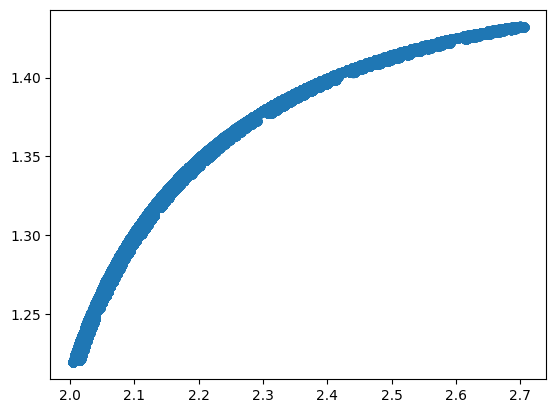

In [14]:
import matplotlib.pyplot as plt

pnt_az = pointing_xds.POINTING_BEAM.sel(local_sky_dir_label='az')
pnt_alt = pointing_xds.POINTING_BEAM.sel(local_sky_dir_label='alt')

plt.figure()
plt.scatter(pnt_az, pnt_alt)
plt.show()

### System Calibration

In [15]:
ms_xds.system_calibration_xds

<xarray.Dataset> Size: 5MB
Dimensions:         (antenna_name: 2, time_cal: 9, receptor_label: 2,
                     frequency_cal: 4096)
Coordinates:
  * antenna_name    (antenna_name) <U9 72B 'PM01_T703' 'PM02_T701'
  * frequency_cal   (frequency_cal) int64 33kB 0 1 2 3 4 ... 4092 4093 4094 4095
  * receptor_label  (receptor_label) int64 16B 0 1
  * time_cal        (time_cal) float64 72B 5.036e+09 5.036e+09 ... 7.13e+09
Data variables:
    TCAL            (antenna_name, time_cal, receptor_label, frequency_cal) float64 1MB dask.array<chunksize=(1, 5, 2, 4096), meta=np.ndarray>
    TRX             (antenna_name, time_cal, receptor_label, frequency_cal) float64 1MB dask.array<chunksize=(1, 5, 2, 4096), meta=np.ndarray>
    TSKY            (antenna_name, time_cal, receptor_label, frequency_cal) float64 1MB dask.array<chunksize=(1, 5, 2, 4096), meta=np.ndarray>
    TSYS            (antenna_name, time_cal, receptor_label, frequency_cal) float64 1MB dask.array<chunksize=(1, 5, 2, 4096), meta=np.ndarray>
Attributes:
    type:     system_calibration